# 1. Business Understanding
Before being a host, we may have the following questions:

1. Is your location suitable to host on Airbnb?
2. What type of property you can earn from it?
3. What other factors may help you make a decision on the price of your place?


# 2. Data Understanding
If the data from living.csv is broken, please download the data in Taipei section from **Inside Airbnb**. <br>
Let's first look into the data to pick up columns of interest might help us anwser the questions in the first section.

In [54]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./listings.csv')
pd.set_option('display.max_columns', None) ## to see all columns in the data
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,74641,https://www.airbnb.com/rooms/74641,20201030035535,2020-10-30,黑白雙人房@南京復興站。小巨蛋斜對面。溫泉式浴缸。,"私人衛浴大套房,距南京復興站走路2分鐘。面對7-11便利商店,旁邊就是南京微風百貨和IKEA...",This area is what we called Business & Residen...,https://a0.muscache.com/pictures/10787933/fa20...,393116,https://www.airbnb.com/users/show/393116,Yi-Wan,2011-02-15,Taipei,I carve small wooden objects by hand tools & s...,NaN,NaN,100%,f,https://a0.muscache.com/im/users/393116/profil...,https://a0.muscache.com/im/users/393116/profil...,Songshan,4,4,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Songshan District, Taipei, Taiwan",松山區,NaN,25.05159,121.54747,Private room in guest suite,Private room,3,NaN,1 private bath,1.0,1.0,"[""Iron"", ""Paid parking off premises"", ""TV"", ""S...","$1,429.00",3,28,3,3,28,28,3.0,28.0,NaN,t,28,58,88,88,2020-10-30,49,1,0,2011-11-20,2020-01-02,88.0,9.0,9.0,9.0,10.0,9.0,9.0,NaN,f,4,0,4,0,0.45
1,74643,https://www.airbnb.com/rooms/74643,20201030035535,2020-10-30,小巨蛋。南京復興站溫馨套房,"小巨蛋對面，距南京復興站走路2分鐘。面對7-11便利商店,旁邊就是南京微風百貨；私人衛浴套房...",微風南京，台北小巨蛋。<br />南京復興捷運站，兄弟飯店，文華飯店。,https://a0.muscache.com/pictures/10794157/4b52...,393116,https://www.airbnb.com/users/show/393116,Yi-Wan,2011-02-15,Taipei,I carve small wooden objects by hand tools & s...,NaN,NaN,100%,f,https://a0.muscache.com/im/users/393116/profil...,https://a0.muscache.com/im/users/393116/profil...,Songshan,4,4,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Songshan District, Taiwan",中山區,NaN,25.04939,121.54352,Private room in guest suite,Private room,2,NaN,1.5 baths,1.0,1.0,"[""Long term stays allowed"", ""Hangers"", ""Heatin...","$1,429.00",3,365,3,3,365,365,3.0,365.0,NaN,t,30,60,86,86,2020-10-30,52,1,0,2011-04-05,2019-12-31,94.0,10.0,9.0,10.0,10.0,10.0,9.0,NaN,f,4,0,4,0,0.45
2,178036,https://www.airbnb.com/rooms/178036,20201030035535,2020-10-30,單人床位 Single bunk bed [mixed dorm for 4pax],Hello from Taipei :)<br />We are located at Z...,Local food within 5 mins walk<br />6 mins walk...,https://a0.muscache.com/pictures/1263b356-1513...,851825,https://www.airbnb.com/users/show/851825,TaipeiTaipei Hostel,2011-07-21,"Da’an District, Taipei City, Taiwan",Hello :D\nThis is Taipei Taipei Team!\nWe are ...,within an hour,100%,95%,f,https://a0.muscache.com/im/pictures/user/c9e25...,https://a0.muscache.com/im/pictures/user/c9e25...,Zhongzheng,9,9,"['email', 'phone', 'facebook', 'reviews']",t,t,"Zhongzheng District, Taipei, Taiwan",中正區,NaN,25.04446,121.51346,Room in hostel,Hotel room,1,NaN,4 baths,1.0,4.0,"[""Room-darkening shades"", ""Breakfast"", ""Shampo...",$597.00,1,90,1,2,90,90,1.3,90.0,NaN,t,29,59,84,359,2020-10-30,80,9,0,2011-07-30,2020-09-14,92.0,9.0,9.0,10.0,10.0,10.0,10.0,NaN,t,8,0,1,1,0.71
3,2717

# 3. Data Preparation

## Location
Location is the main factor to affect the price of a place.
So, let's have a look at subsets of **neighbourhood_cleansed** with **price**.


### Clean the data
Replace Mandarin with English allowing more people to better understand our analysis.

In [55]:
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('中正區', 'Zhongzheng')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('大同區', 'Datong')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('中山區', 'Zhongshan')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('松山區', 'Songshan')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('大安區', "Da'an")
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('萬華區', 'Wanhua')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('信義區', 'Xinyi')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('士林區', 'Shilin')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('北投區', 'Beitou')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('內湖區', 'Neihu')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('南港區', 'Nangang')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('文山區', 'Wenshan')
df.shape

(5431, 74)

[Text(0, 0.5, 'Number of hosts'), Text(0.5, 0, 'Location')]

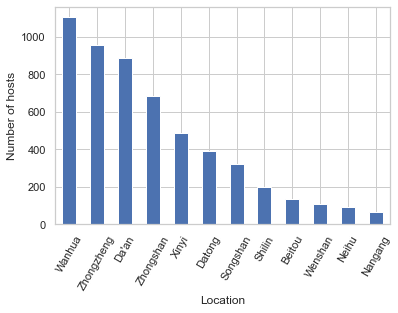

In [56]:
loc_counts = df['neighbourhood_cleansed'].value_counts()
loc_plot = loc_counts.plot(kind='bar', rot=60)
loc_plot.set(xlabel="Location", ylabel="Number of hosts")

1. From the figure above, Wanhua is the region that most people host on Airbnb.
2. Wenshan, Neihu, and Nangang are much lower than other districts.

Check out the average price of each district.

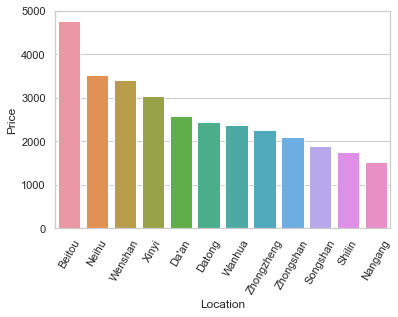

In [57]:
## Convert the string type of price to int to compute the mean of it
df['price'] = df['price'].replace('[$,]', '', regex=True).astype(float)
df['price'] = df['price'].astype('int')

x = pd.DataFrame(df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False))
x = x.reset_index()

sns.set(style="whitegrid")
sns.barplot(x = 'neighbourhood_cleansed',
            y = 'price',
            data = x)
plt.xticks(rotation=60)
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()

1. Beitou is the most expensive district for people to stay with almost NT5000.
2. The cost of Neihu, Wenshan, and Xinyi is between NT3000 and NT4000.
3. The rest of places are lower than NT3000.

## Room Types

The type of property is one of the main factors to affect the price of a place. However, Taipei is a small city so most places hosting on Airbnb are kinds of rooms so we prefer to use **room_type** instead of **property_type** for further analysis.

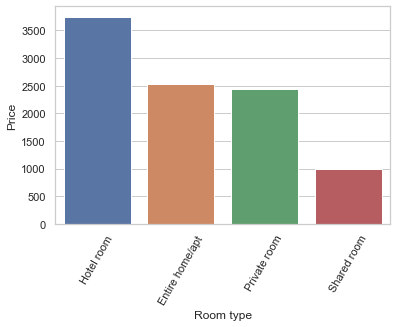

In [58]:
x = pd.DataFrame(df.groupby('room_type')['price'].mean().sort_values(ascending=False))
x = x.reset_index()

sns.barplot(x = 'room_type',
            y = 'price',
            data = x)
plt.xticks(rotation=60)
plt.xlabel('Room type')
plt.ylabel('Price')
plt.show()

1. The type of the hotel room is the highest average price compared to others.
2. On the other hand, the type of the shared room is the lowest.
3. The type of the entire home/apartment and the private room share the similar price of NT2500. 

Also, what types of rooms distribute to each of the districts.

Text(0, 0.5, 'Number of rooms')

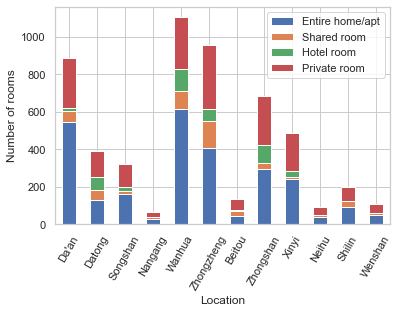

In [59]:
room_type_count = df.groupby('neighbourhood_cleansed')['room_type'].value_counts()
sorted_data = []
listed_loc = list(set(df['neighbourhood_cleansed']))
listed_room_type = list(set(df['room_type']))
for loc in listed_loc:
    types = []
    for room in listed_room_type:
        try:
            types.append(room_type_count[loc][room])
        except:
            types.append(0)
    sorted_data.append(types)
sorted_data
ax = pd.DataFrame(data=sorted_data, index=listed_loc, columns=listed_room_type)
ax.plot.bar(stacked=True, rot=60)
plt.xlabel('Location')
plt.ylabel('Number of rooms')

1. The entire home/apt and the private room are the type that the most people host in each district.

## Price Pridiction
First things first, we assume the following factors in the data below may influence the price the most.<br>

**neighbourhood_cleansed<br>
host_listings_count<br>
room_type<br>
accommodates<br>
bathrooms_text<br>
bedrooms<br>
beds<br>
amenities<br>
price**<br>

In [60]:
#Therefore, we only put the columns we choose into our df,
picked_df = df[['beds', 'bedrooms', 'bathrooms_text',
                'host_listings_count', 'accommodates',
                'amenities', 'neighbourhood_cleansed',
                'room_type', 'price']]

### Clean the data


Convert string to float to count how many bath rooms of that place.

In [61]:
for i, text in enumerate(picked_df['bathrooms_text']):
    try:
        text = text.split(' ')[0]
        if text == 'Shared' or text == 'Half-bath':
            picked_df['bathrooms_text'][i] = 0.5
        else:
            picked_df['bathrooms_text'][i] = float(text)
    except:
        picked_df['bathrooms_text'][i] = 1.0
        
picked_df['bathrooms'] = picked_df['bathrooms_text'].astype('float')
picked_df.drop(['bathrooms_text'], axis=1, inplace=True)

<ipython-input-61-ef9d2535a468>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  picked_df['bathrooms_text'][i] = float(text)
C:\Users\A40471\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-61-ef9d2535a468>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  picked_df['bathrooms_text'][i] = 1.0
<ipython-input-6

List every single amenity from the data.<br>
Make each of them have a specific column for modeling.

In [62]:
## Get rid of any characters to help make a list later.
picked_df['amenities'] = picked_df['amenities'].replace('["]', '', regex=True)

list_amenities = []
unique_amenities = set()
for amenities in picked_df['amenities']:
    amenities = amenities[1:-1].split(',')
    temp = []
    for amenity in amenities:
        amenity = amenity.strip(' ')
        if amenity == '':
            continue
        temp.append(amenity)
        unique_amenities.add(amenity)
    list_amenities.append(temp)

## Create each column for individual amenities.
picked_df['amenities'] = list_amenities
for amenity in unique_amenities:
    picked_df[amenity] = picked_df['amenities'].apply(lambda x: 1 if amenity in x else 0)

##　To count how many amenities in each row.
picked_df['num_amenities'] = picked_df['amenities'].apply(lambda x: len(x))

## We don't need the original column of amenities any more.
picked_df.drop(['amenities'], axis=1, inplace=True)

<ipython-input-62-6d4d4bdc8f6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  picked_df['amenities'] = picked_df['amenities'].replace('["]', '', regex=True)
<ipython-input-62-6d4d4bdc8f6a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  picked_df['amenities'] = list_amenities
<ipython-input-62-6d4d4bdc8f6a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

Fill nan in the columns with the mean for numerical variables and dummies for objects.

In [63]:
## Fill any nan in the columns included float with the mean of that column
num_vars = picked_df.select_dtypes(include=['float']).columns
for col in num_vars:
    picked_df[col].fillna(picked_df[col].mean(), inplace=True)
    
## Encode each categorical variable
cat_vars = picked_df.select_dtypes(include=['object'])
dummies = pd.get_dummies(cat_vars)

for var in cat_vars:
    picked_df.drop([var], axis=1, inplace=True)

picked_df = pd.concat([picked_df, dummies], axis=1, sort=False)

### Normalization
In order to make a model having a better result, we need to normalize the data.

In [64]:
## Convert numerical data from int to float to make sure each of them can be normalized later
## Hint: Do not normalize catogories.

picked_df['host_listings_count'] = picked_df['host_listings_count'].astype('float')
picked_df['accommodates'] = picked_df['accommodates'].astype('float')
picked_df['price'] = picked_df['price'].astype('float')

num_vars = picked_df.select_dtypes(include=['float']).columns
names = num_vars
scaled_df = pd.DataFrame(preprocessing.normalize(picked_df[num_vars]), columns=names)
picked_df.drop(num_vars, axis = 1, inplace=True)

picked_df = pd.concat([picked_df, scaled_df], axis=1, sort=False)

Before training, double check the picked data that is what we expected.


In [65]:
picked_df

,Luggage dropoff allowed,cherry gas stove,Body soap,Beachfront,Stair gates,Waterfront,Baking sheet,Shampoo,Smart lock,Keypad,Table corner guards,Washer,Wifi \u2013 40 Mbps,Barbecue utensils,Long term stays allowed,Changing table,HDTV with premium cable,HDTV with standard cable,Gym,Essentials,32\ HDTV with premium cable,Paid parking garage off premises,BOSE sound system,Shower gel,Ethernet connection,Window guards,Yinghua induction stove,Children\u2019s dinnerware,Patio or balcony,Heating,Nespresso machine,Bread maker,First aid kit,Bed linens,Pool,Outlet covers,Free parking on premises,Electric stove,house shampoo,Wifi,Coffee maker,BBQ grill,Iron,Paid parking garage on premises \u2013 1 space,Room-darkening shades,Indoor fireplace,36\ HDTV with standard cable,Trash compactor,Fireplace guards,Piano,42\ HDTV with premium cable,Hangers,Johnson's \u5b0c\u751f shampoo,Free street parking,Microwave,YAMAHA sound system with aux,Beach essentials,Dryer,Lock on bedroom door,Dishes and silverware,Children\u2019s books and toys,Cooking basics,Mini fridge,Bathtub,Conditioner,Ceiling fan,Building staff,Teco refrigerator,HDTV with Netflix,Pocket wifi,Stove,standard cable,Portable fans,Dryer \u2013 In building,Single level home,Free driveway parking on premises \u2013 1 space,Baby monitor,23\ HDTV with Chromecast,Laundromat nearby,Washer \u2013\u00a0In building,Wifi \u2013 80 Mbps,EV charger,Lockbox,Host greets you,Paid parking on premises,50\ HDTV with standard cable,Cleaning before checkout,Garden or backyard,Lake access,Private entrance,Extra pillows and blankets,Crib,Game console,Baby bath,44\ HDTV with standard cable,Pour Over Coffee,Breakfast,Elevator,Chromecast,Induction stove,Oven,Fire extinguisher,Private living room,Paid parking garage on premises,High chair,Freezer,Dryer \u2013\u00a0In unit,Central air conditioning,Washer \u2013\u00a0In unit,Paid parking off premises,Hot tub,Wifi \u2013 100 Mbps,Paid street parking off premises,Cable TV,Carbon monoxide alarm,TV,Hot water,Paid parking lot off premises,Hair dryer,Dishwasher,Babysitter recommendations,Smoke alarm,Rice Maker,premium cable,Window AC unit,Bluetooth sound system,Refrigerator,Paid parking garage on premises \u2013 8 spaces,Sound system,House shampoo,HITACHI refrigerator,Kitchen,Air conditioning,Laptop-friendly workspace,Pack \u2019n Play/travel crib,num_amenities,neighbourhood_cleansed_Beitou,neighbourhood_cleansed_Da'an,neighbourhood_cleansed_Datong,neighbourhood_cleansed_Nangang,neighbourhood_cleansed_Neihu,neighbourhood_cleansed_Shilin,neighbourhood_cleansed_Songshan,neighbourhood_cleansed_Wanhua,neighbourhood_cleansed_Wenshan,neighbourhood_cleansed_Xinyi,neighbourhood_cleansed_Zhongshan,neighbourhood_cleansed_Zhongzheng,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,beds,bedrooms,host_listings_count,accommodates,price,bathrooms
0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,21,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.000700,0.000700,0.002799,0.002099,0.999993,0.000700
1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,20,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.000700,0.000700,0.002799,0.001400,0.999994,0.001050
2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,23,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.006699,0.001675,0.015073,0.001675,0.999839,0.006699
3,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,

# 4. Model Building


In [66]:
## Make price as target and the rest of elements as the training data to build a model.
X = picked_df.drop(['price'], axis=1)
y = picked_df['price']

## Split the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

## Linear Regression method
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

## Prediction
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test)

## Evaluation
print("r2 score on train set: {}".format(r2_score(y_train, y_train_preds)))
print("r2 score on test set: {}".format(r2_score(y_test, y_test_preds)))


r2 score on train set: 0.8319270803449115
r2 score on test set: 0.842376264952537


Let's see what features influence the price the most.

In [67]:
coefs_df = pd.DataFrame()

coefs_df['factors'] = X_train.columns
coefs_df['coefs'] = lm_model.coef_
coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
coefs_df.sort_values('abs_coefs', ascending=False).head(5)

,factors,coefs,abs_coefs
153,bedrooms,0.257535,0.257535
154,host_listings_count,-0.060182,0.060182
156,bathrooms,0.021371,0.021371
155,accommodates,-0.021150,0.021150
152,beds,-0.017114,0.017114


1. The top 5 features look like have the same property related to the number of spaces allowing people to stay.

In [68]:
## Let's only look at the positive part. 

coefs_df.sort_values('coefs', ascending=False).head(5)

,factors,coefs,abs_coefs
153,bedrooms,0.257535,0.257535
156,bathrooms,0.021371,0.021371
103,Paid parking garage on premises,0.000528,0.000528
77,23\ HDTV with Chromecast,0.000500,0.000500
108,Washer \u2013\u00a0In unit,0.000499,0.000499


1. Amenities show up!
2. The top 1 of amenities is paid parking garage on premises. 

# 5. Evaluation of Results

**1. Is your location suitable to host on Airbnb?**<br>
Wanhua is the best ditrict to host on Airbnb.

**2. What type of property you can earn from it?**<br>
An entire apartment or a private room is the type that most people host on Airbnb and you can make around NT2500 from it.

**3. What other factors may help you make a decision on the price of your place?**<br>
An apartment divided to a couple of private rooms with its own bathrooms is the best options for Airbnb in Taipei. Plus, if you had space for people to park their cars, you can make the price a little bit higher!
